# Lab Report: Metropolis Algorithm Simulation for Ising Model

## Abstract
This experiment employs the Metropolis algorithm to simulate the Ising model, investigating the behavior of the system at varying temperatures. The primary objective is to observe and analyze equilibrium states, fluctuations, and phase transitions, with an optional exploration of additional model modifications.

## 1. Introduction

### 1.1 Background
The Ising model describes the behavior of magnetic spins in a lattice, offering insights into phase transitions and critical phenomena in statistical mechanics. For a system of interacting spins on a 2D lattice of sites, the Hamiltonian describing the energy of interaction is
$$
  {\cal H} = - \sum_{i,j} J_{ij} s_i s_j -\mu \sum_j h_j s_j
$$
where the index $j$ runs over all spins on the lattice, while the index $i$ runs over those spins with which spin $s_j$ interacts, with the interaction strength $J_{ij}$. In the case of spin-1/2, each $s_j$ can take on values of +1 or -1.  Typical example is a nearest-neighbour interaction, on a square lattice implying interactions with spins directly North, South, East and West of site $j$. The sign of the interaction $J_{ij}$ determines whether the interaction favors (lowers the energy for) spins aligned parallel to their neighbours ($J_{ij}>0$, ferromagnetic), or anti-parallel to their neighbours ($J_{ij}<0$, antiferromagnetic). In the absence of spin-spin interactions, $J_{ij}=0$.  

The second sum describes the interaction of spins with an external field: $\mu$ is the unit of strength (a magnetic moment of a single spin) and $h_j$ represents the strength pf the field at site $j$.  Positive $h_j$ value implies that the alignment along the external field is energetically favourable, $h_j < 0$ favours spins aligning against the field, and $h_j=0$ indicates the absence of the external field.

The probability of encountering a particular configuration $\{s\}$ of spins on the lattice is given by the Boltzmann factor:
$$
  P(\{s\}) = \frac{e^{-{\cal H(\{s\})}/k_B T}}{\sum_{\{s\}} e^{-{\cal H(\{s\})}/k_B T}}
$$
with the sum over all possible configurations of the system in the denominator being the partition function $Z$.  Often the notation $\beta = 1/k_b T$ (the inverse temperature) is used; with that,
$$
  P(\{s\}) = \frac{1}{Z} e^{-\beta{\cal H(\{s\})}}
$$
In two or more dimensions, the Ising model exhibits interesting phase behaviour, including ferromagnetic phase transitions, and is widely studied.

The limitations of finite size of the model lattice of spins are normally overcome by imposing periodic boundary conditions.


### 1.2 Monte-Carlo and $\pi$

The principle of Monte-Carlo sampling can be well illustrated by the following method of determining $\pi$, from the ratio of the area of a unit circle, $S_c = \pi r^2 = \pi$ and the area of the square that circumscribes it, $S_s = 2\times 2 = 4$.  Imagine randomly dropping stones anywhere inside the square, but counting how many stones fall inside the circle ($N_{in}$), and how many outside of the circle ($N_{out}$). If the probability of dropping a stone anywhere inside the square is equal, then the fraction of the total number of stones that fall inside the circle will correspond to the fraction that the area of the square that is occupied by the circle, i.e. 
$$
  \frac{N_{in}}{N_{in}+N_{out}} = \frac{S_c}{S_s} = \frac{\pi}{4}  
$$

### 1.3 Metropolis algorithm

Given a configuration $\{s\}$, the evolution of the system is always toward <i>lower</i> total energy.  Therefore, for each spin one needs to:

- flip the spin
- calculate the new total energy of the system
- if the energy is lowered by the flip, accept the new configuration, otherwise reject it and keep this spin as is

A flip of a spin only affects the spins in the vicinity of this spin, i.e. the interactions are always local (for example over the four nearest-neighbour spins). Periodic boundary conditions take care of the edge spins, for example the East neighbour of the last spin in a row is the first spin in this row, etc.

Clearly, such an algorithm should move the system toward an "all up"/"all down" (depending on the external field) states of the system in the ferromagnetic configuration, and into a "checkerboard" patter of up/down spins in the case of the antiferromagnetic interaction. 

But how does one mimic a non-zero absolute temperature and the related fluctuations for such a system?

For any finite temperature, the fluctuations can be modeled by modifying the last step in the above algorithm:

- if the energy is lowered by the flip, accept the new configuration, otherwise accept it only with probability $e^{-\beta{\cal H}}$

In practice, this is achieved by generating a random number $ r\in[0,1] $, and accepting the new configuration if $r < e^{-\beta{\cal H}}$  (even if the energy is increased by the flip).

Repeating this evolution step many times mimics the evolution of the spins system toward a thermal equilibrium with an imaginary "reservoir" at temperature $T$.  During this evolution,one can monitor the total energy ${\cal H}$ and the total magnetization $M$ of the system:
$$
  M = \mu \sum_j s_j
$$

## 2. Setup

### 2.1 Set up a 2D rectangular lattice of spins

Initial state will be a random orientation of $2N+1 \times 2N+1$ spins. Here we assume that all sites can only have the magnetic moment of $+\mu$ or $-\mu$. `rand()` produces a random number somewhere in the 0..1 range, and and a shift of -0.5 makes it equally likely for the sign to be up or down. To visualize the state of the spin lattice, we can use colour to enhance the previous picture.  While we are at it, we can make the function a little more robust by adding error checking. 

Therefore, the following `DisplayIsing` function visualizes a 2D Ising model by creating a quiver plot of spins on a square lattice. The input parameter `S` represents the spin configuration matrix, where the dimensions must be square and follow the form 2N+1 x 2N+1. The function checks for the validity of the input matrix and displays spins using arrows on a grid. The color of the arrows indicates the spin orientation, with upward spins in a specified color (`up_colour`) and downward spins in another color (`dn_colour`). The function uses the `quiver` function to plot the arrows, adjusting the positions based on the spin values in the matrix.

To ensure a proper visualization, the function sets the axis to be equal, limits the plot within a specified range, and turns off axis labels. The visualization helps in understanding the spatial arrangement of spins in the Ising model. Additionally, the code includes error handling to ensure the input matrix has the correct dimensions for a 2D Ising model.


In [1]:
function DisplayIsing (S,up_colour='blue', dn_colour='red')
  [n,m] = size(S);
  if (n != m)
    error("need a square matrix for S")
    endif
  N = round((n-1)/2);
  if (2*N+1 != n)
    error("matrix dimensions are not 2N+1 x 2N+1")
    endif
  [X,Y] = meshgrid(-N:N,-N:N);
  hold on;
  quiver(X,Y-0.5*S,0*S,S,0,'color',dn_colour);
  ### zero all negative values in S, repaint those that are +ve in up_colour
  S = ifelse(sign(S) == 1, S, 0);
  quiver(X,Y-0.5*S,0*S,S,0,'color',up_colour);
  hold off;
  axis equal;
  xlim([-N-1,N+1]);
  ylim([-N-1,N+1]);
  axis off;
endfunction;

### 2.2 Monte-Carlo Simulation of 2D Ising Model Using Metropolis Algorithm

For two and higher dimensions, the 2D Ising model can be extended by introducing islands of defects. The cost of these defects is proportional to the perimeter $L = εN^2$, where $0 < ε < 1$. In 2D, the number of islands scales as $3εN^2$, and the change in energy is given by $\Delta E = \epsilon 4JN^2$. The change in free energy $\Delta F$ is then $ \epsilon 4JN^2 - k_B T ln( N^(2/3) \epsilon N^2 )$. This provides a rough estimate of the critical temperature $ T_c ~ J/k_B $. The following code simulates the 2D Ising model using the Metropolis algorithm. The main steps of the Metropolis algorithm are:

- Prepare an initial configuration of N spins
- Flip the spin of a randomly chosen lattice site.
- Calculate the change in energy ΔE.
- If ΔE < 0, accept the move. Otherwise, accept the move with probability exp(-ΔE/T).
- This satisfies the detailed balance condition, ensuring a final equilibrium state.
- Repeat steps 2-4.

In the code below, we have estimated and plotted energy, magnetization, specific heat, and susceptibility of the system.


Here, we are setting up the values for temperature points that the loop is iterating over, the size of the lattice, and number of iterations for equilibrium and calculation for the upcoming code.

In [2]:
% Set parameters
nt = 88;         % Number of temperature points
N = 9;           % Size of the lattice, N x N
eqSteps = 1000;  % Number of MC sweeps for equilibration
mcSteps = 1000;  % Number of MC sweeps for calculation

Here, we define the number of temperature points, and we are initialising matrices for Energy (E), Magnetization (M), Specific Heat Capacity (C), and (X)

- **T**: Array of temperatures created using `linspace` ranging from 1.53 to 3.28 with `nt` points.
- **E, M, C, X**: Arrays initialized to store energy, magnetization, specific heat, and susceptibility at each temperature point.

In [3]:
T = linspace(0.1, 3.28, nt); % Temperature points
E = zeros(1, nt); % Energy
M = zeros(1, nt); % Magnetization
C = zeros(1, nt); % Specific Heat
X = zeros(1, nt); % Susceptibility

In summary, `n1` and `n2` are normalization factors used to scale the accumulated values of energy and magnetization in a way that provides meaningful average and fluctuation quantities per lattice site and Monte Carlo step. They play a crucial role in obtaining physically relevant results from the Monte Carlo simulation.

In [4]:
n1 = 1.0 / (mcSteps * N * N); 
n2 = 1.0 / (mcSteps * mcSteps * N * N);

Sets up the initial state of the matrix using random values

In [5]:
function state = initialstate(N)
    state = randi([0, 1], N, N); % Generate 0 or 1
    state(state == 0) = -0.5;    % Replace 0 with -0.5
    state(state == 1) = 0.5;     % Replace 1 with 0.5
end


### 2.2 Algorithm Modification
The `Evolve()` function is modified to incorporate the Metropolis algorithm for updating spin configurations.

In [6]:
function config = evolve(config, beta)
    [N, ~] = size(config); % Get the size of the lattice configuration

    % Generate random indices for lattice sites
    a = randi([1, N], N, N);
    b = randi([1, N], N, N);

    % Extract the spins at the randomly chosen lattice sites
    s = config(sub2ind([N, N], a, b));

    % Calculate the sum of neighboring spins
    nb = config(sub2ind([N, N], mod(a - 1, N) + 1, b)) + config(sub2ind([N, N], a, mod(b - 1, N) + 1)) + config(sub2ind([N, N], mod(a - 2, N) + 1, b)) + config(sub2ind([N, N], a, mod(b - 2, N) + 1));

    % Calculate the energy cost of flipping each spin
    cost = 2 * s .* nb;

    % Determine which spins will flip based on the Metropolis criterion
    flip = (rand(N, N) < exp(-cost * beta)); %| (cost < 0); % Not considering the energy cost

    % Update the lattice configuration with flipped spins
    config(sub2ind([N, N], a, b)) = -s .* flip + s .* (~flip);
end


### 2.3 Data Collection

Total energy and magnetization are calculated and recorded at each step. Equilibrium states are determined, with early states reflecting initial conditions ignored. The purpose of this part of the code is to perform a Monte Carlo simulation at a first temperature index (tt) (Iterating over each temperature values is done below). It visualizes the evolution of the Ising model configuration at certain iteration steps and calculates thermodynamic quantities based on the evolved configurations. The visualization part helps observe how the Ising model evolves over time, and the thermodynamic quantities provide insights into the system's behavior at the given temperature.

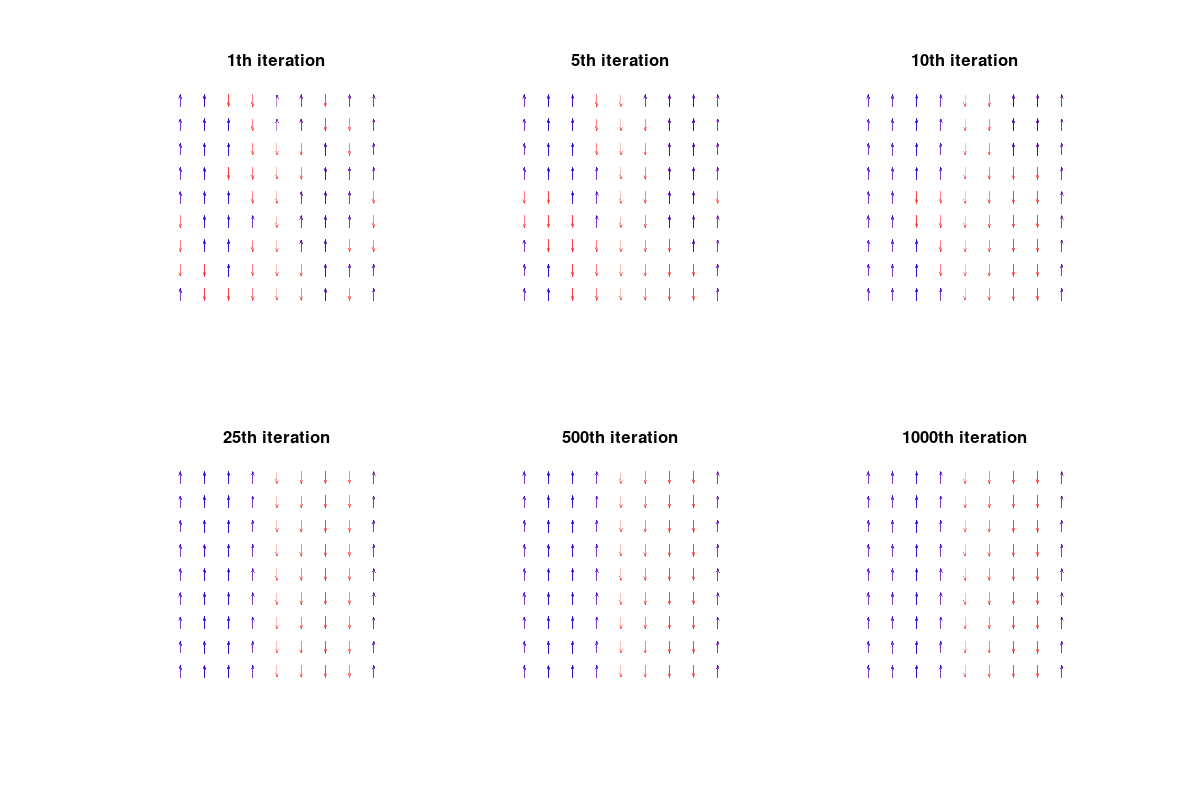

In [7]:
% For the first iteration
tt = 1;
E1 = 0;
M1 = 0;
E2 = 0;
M2 = 0;
config = initialstate(N); % Initialize the lattice configuration
iT = 1.0 / T(tt);         % Inverse temperature for the current iteration
iT2 = iT * iT;            % Square of the inverse temperature

% Create a subplot with 2 rows and 3 columns for visualization
figure('Position', [100, 100, 1200, 800]);  % [left, bottom, width, height]);
for i = 1:eqSteps
    config = evolve(config, iT); % Perform a Monte Carlo step (evolution of the lattice)
    % Display the lattice configuration at selected iterations
    if ismember(i, [1, 5, 10, 25, 500, 1000])
        subplot(2, 3, find([1, 5, 10, 25, 500, 1000] == i));
        hold on;
        DisplayIsing(config); % Visualize the Ising model configuration
        title(sprintf("%dth iteration", i));
        hold off;
    end
end

% Perform Monte Carlo steps for calculation
for i = 1:mcSteps
    config = evolve(config, iT); % Monte Carlo step
    % Calculate energy and magnetization
    Ene = -0.25 * sum(sum(config .* (circshift(config, [0, 1]) + circshift(config, [1, 0]) + circshift(config, [0, -1]) + circshift(config, [-1, 0]))));
    Mag = sum(config(:));

    % Accumulate values for thermodynamic quantities
    E1 = E1 + Ene;
    M1 = M1 + Mag;
    M2 = M2 + Mag * Mag;
    E2 = E2 + Ene * Ene;
end

% Normalize and store thermodynamic quantities for the current temperature
E(tt) = n1 * E1;
M(tt) = n1 * M1;
C(tt) = (n1 * E2 - n2 * E1^2) * iT2;
X(tt) = (n1 * M2 - n2 * M1^2) * iT;



### 2.4 Temperature Variation
The simulation is repeated at different temperatures to observe equilibrium values and fluctuations.

In [8]:
% Loop over temperature points
for tt = 1:nt
    E1 = 0;
    M1 = 0;
    E2 = 0;
    M2 = 0;
    config = initialstate(N); % Initialize the lattice configuration
    iT = 1.0 / T(tt); % Inverse temperature for the current iteration
    iT2 = iT * iT; % Square of the inverse temperature

    % Equilibration: Perform Monte Carlo steps to reach equilibrium
    for i = 1:eqSteps
        config = evolve(config, iT);
    end

    % Calculation: Perform additional Monte Carlo steps for calculation
    for i = 1:mcSteps
        config = evolve(config, iT); % Monte Carlo step
        % Calculate energy and magnetization
        Ene = -0.25 * sum(sum(config .* (circshift(config, [0, 1]) + circshift(config, [1, 0]) + circshift(config, [0, -1]) + circshift(config, [-1, 0]))));
        Mag = sum(config(:));

        % Accumulate values for thermodynamic quantities
        E1 = E1 + Ene;
        M1 = M1 + Mag;
        M2 = M2 + Mag * Mag;
        E2 = E2 + Ene * Ene;
    end

    % Normalize and store thermodynamic quantities for the current temperature
    E(tt) = n1 * E1;
    M(tt) = n1 * M1;
    C(tt) = (n1 * E2 - n2 * E1^2) * iT2;
    X(tt) = (n1 * M2 - n2 * M1^2) * iT;
end


## 3. Data Analysis

### 3.1 Plotting
Magnetization is plotted as a function of temperature, facilitating the identification of ferromagnetic and antiferromagnetic transitions.

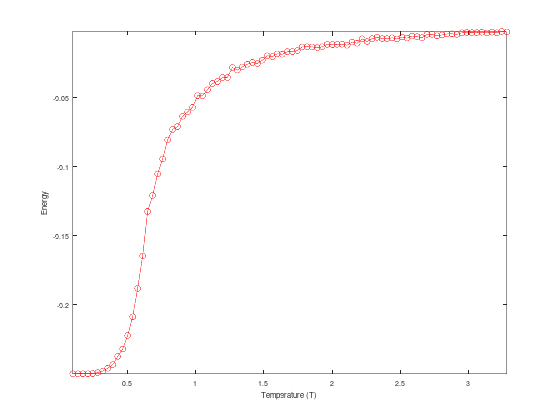

In [9]:
% Plot for Energy
figure;
plot(T, E, 'ro-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Energy', 'fontsize', 12);
axis tight;


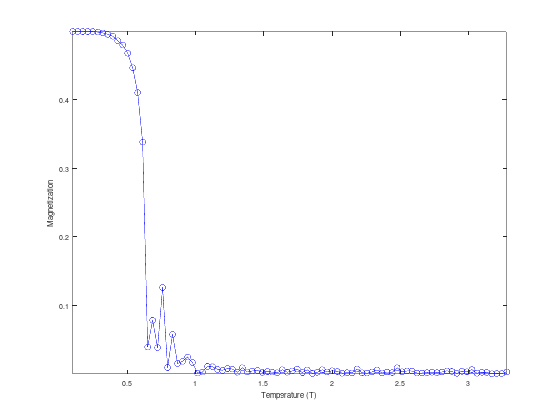

In [10]:

% Plot for Magnetization
figure;
plot(T, abs(M), 'bo-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Magnetization', 'fontsize', 12);
axis tight;

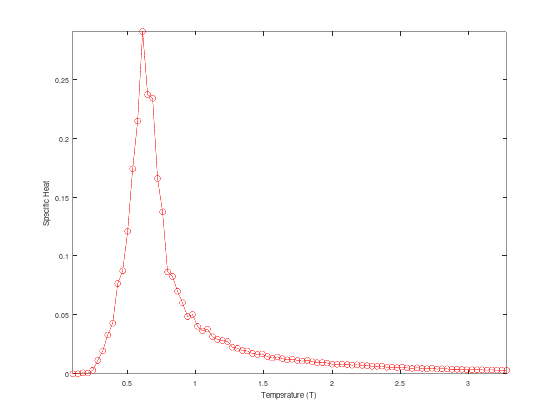

In [11]:
% Plot for Specific Heat
figure;
plot(T, C, 'ro-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Specific Heat', 'fontsize', 12);
axis tight;

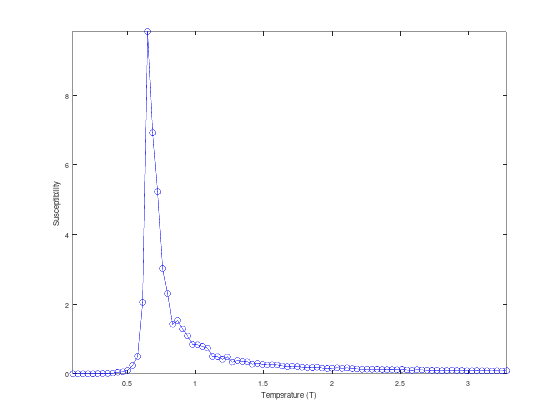

In [12]:
% Plot for Susceptibility
figure;
plot(T, X, 'bo-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Susceptibility', 'fontsize', 12);
axis tight;

### 3.2 Parameter Exploration
A systematic exploration of parameters is conducted to find conditions for ferromagnetic and antiferromagnetic transitions. Here, I have changed the sign of energy cost for thr transition to anti-ferromagnetic state.

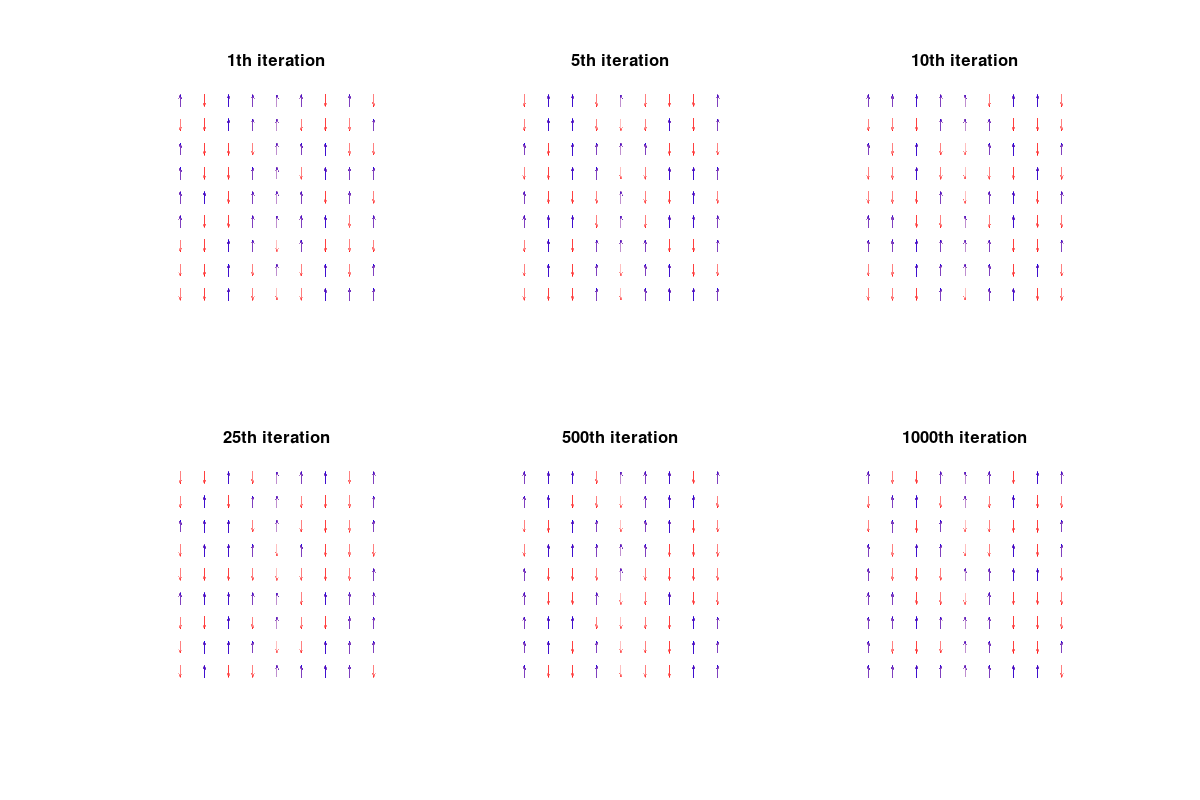

In [13]:
function config = evolve(config, beta)
    [N, ~] = size(config); % Get the size of the lattice configuration

    % Generate random indices for lattice sites
    a = randi([1, N], N, N);
    b = randi([1, N], N, N);

    % Extract the spins at the randomly chosen lattice sites
    s = config(sub2ind([N, N], a, b));

    % Calculate the sum of neighboring spins
    nb = config(sub2ind([N, N], mod(a - 1, N) + 1, b)) + config(sub2ind([N, N], a, mod(b - 1, N) + 1)) + config(sub2ind([N, N], mod(a - 2, N) + 1, b)) + config(sub2ind([N, N], a, mod(b - 2, N) + 1));

    % Calculate the energy cost of flipping each spin 
    cost = - 2 * s .* nb; % Using negative sign for transition to anti-ferromagnetism

    % Determine which spins will flip based on the Metropolis criterion
    flip = (rand(N, N) < exp(-cost * beta)); %| (cost < 0); % Not considering the energy cost

    % Update the lattice configuration with flipped spins
    config(sub2ind([N, N], a, b)) = -s .* flip + s .* (~flip);
end


% For the first iteration
tt = 1;
E1 = 0;
M1 = 0;
E2 = 0;
M2 = 0;
config = initialstate(N); % Initialize the lattice configuration
iT = 1.0 / T(tt);         % Inverse temperature for the current iteration
iT2 = iT * iT;            % Square of the inverse temperature

% Create a subplot with 2 rows and 3 columns for visualization
figure('Position', [100, 100, 1200, 800]);  % [left, bottom, width, height]);
for i = 1:eqSteps
    config = evolve(config, iT); % Perform a Monte Carlo step (evolution of the lattice)
    % Display the lattice configuration at selected iterations
    if ismember(i, [1, 5, 10, 25, 500, 1000])
        subplot(2, 3, find([1, 5, 10, 25, 500, 1000] == i));
        hold on;
        DisplayIsing(config); % Visualize the Ising model configuration
        title(sprintf("%dth iteration", i));
        hold off;
    end
end

% Perform Monte Carlo steps for calculation
for i = 1:mcSteps
    config = evolve(config, iT); % Monte Carlo step
    % Calculate energy and magnetization
    Ene = -0.25 * sum(sum(config .* (circshift(config, [0, 1]) + circshift(config, [1, 0]) + circshift(config, [0, -1]) + circshift(config, [-1, 0]))));
    Mag = sum(config(:));

    % Accumulate values for thermodynamic quantities
    E1 = E1 + Ene;
    M1 = M1 + Mag;
    M2 = M2 + Mag * Mag;
    E2 = E2 + Ene * Ene;
end

% Normalize and store thermodynamic quantities for the current temperature
E(tt) = n1 * E1;
M(tt) = n1 * M1;
C(tt) = (n1 * E2 - n2 * E1^2) * iT2;
X(tt) = (n1 * M2 - n2 * M1^2) * iT;

In [14]:
% Loop over temperature points
for tt = 1:nt
    E1 = 0;
    M1 = 0;
    E2 = 0;
    M2 = 0;
    config = initialstate(N); % Initialize the lattice configuration
    iT = 1.0 / T(tt); % Inverse temperature for the current iteration
    iT2 = iT * iT; % Square of the inverse temperature

    % Equilibration: Perform Monte Carlo steps to reach equilibrium
    for i = 1:eqSteps
        config = evolve(config, iT);
    end

    % Calculation: Perform additional Monte Carlo steps for calculation
    for i = 1:mcSteps
        config = evolve(config, iT); % Monte Carlo step
        % Calculate energy and magnetization
        Ene = -0.25 * sum(sum(config .* (circshift(config, [0, 1]) + circshift(config, [1, 0]) + circshift(config, [0, -1]) + circshift(config, [-1, 0]))));
        Mag = sum(config(:));

        % Accumulate values for thermodynamic quantities
        E1 = E1 + Ene;
        M1 = M1 + Mag;
        M2 = M2 + Mag * Mag;
        E2 = E2 + Ene * Ene;
    end

    % Normalize and store thermodynamic quantities for the current temperature
    E(tt) = n1 * E1;
    M(tt) = n1 * M1;
    C(tt) = (n1 * E2 - n2 * E1^2) * iT2;
    X(tt) = (n1 * M2 - n2 * M1^2) * iT;
end


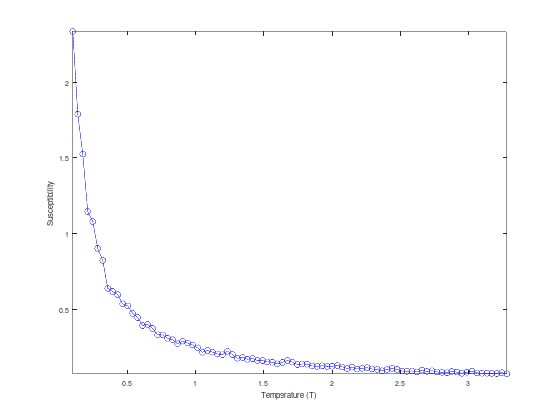

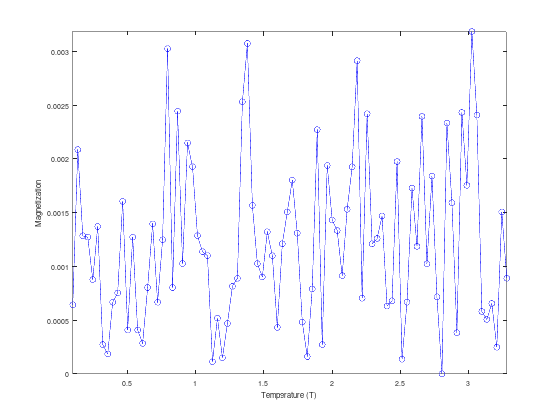

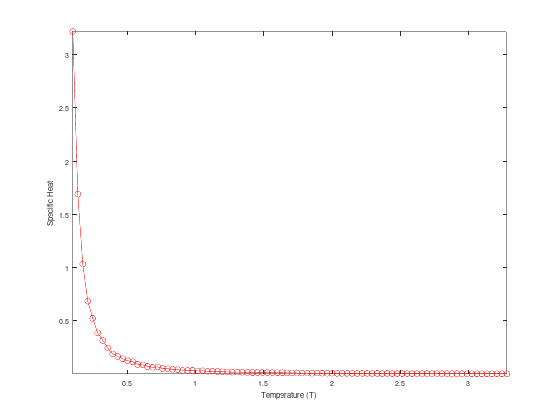

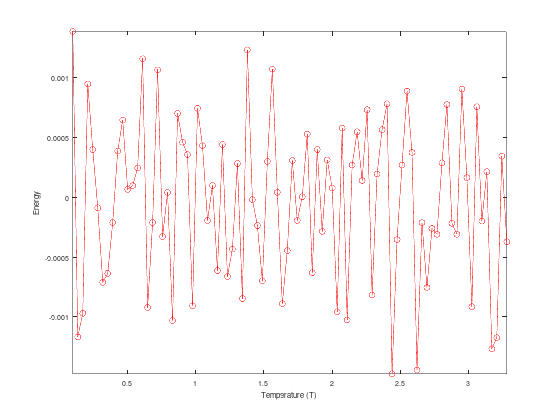

In [15]:
% Plot for Energy
figure;
plot(T, E, 'ro-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Energy', 'fontsize', 12);
axis tight;


% Plot for Magnetization
figure;
plot(T, abs(M), 'bo-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Magnetization', 'fontsize', 12);
axis tight;

% Plot for Specific Heat
figure;
plot(T, C, 'ro-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Specific Heat', 'fontsize', 12);
axis tight;

% Plot for Susceptibility
figure;
plot(T, X, 'bo-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Susceptibility', 'fontsize', 12);
axis tight;

## 4. Independent Modifications: Nearest- and next-nearest-neighbour interactions.

### 4.1 Modified Hamiltonian

The Hamiltonian for an Ising model with next nearest neighbors is given by:

$ H = -J_1 \sum_{\langle i,j \rangle} s_{ij} - J_2 \sum_{\langle\langle i,j \rangle\rangle} s_{ij} $

Where:
- $ J_1 $ represents the coupling constant for nearest neighbors (as in the original Ising model).
- $ J_2 $ represents the coupling constant for next nearest neighbors.
- The first summation $ \sum_{\langle i,j \rangle} $ is over all nearest neighbor pairs.
- The second summation $ \sum_{\langle\langle i,j \rangle\rangle} $ is over all next nearest neighbor pairs.

In the code provided below, $J_1$ is set implicitly, and $J_2$ is explicitly presented in the calculation.

### 4.2 Code

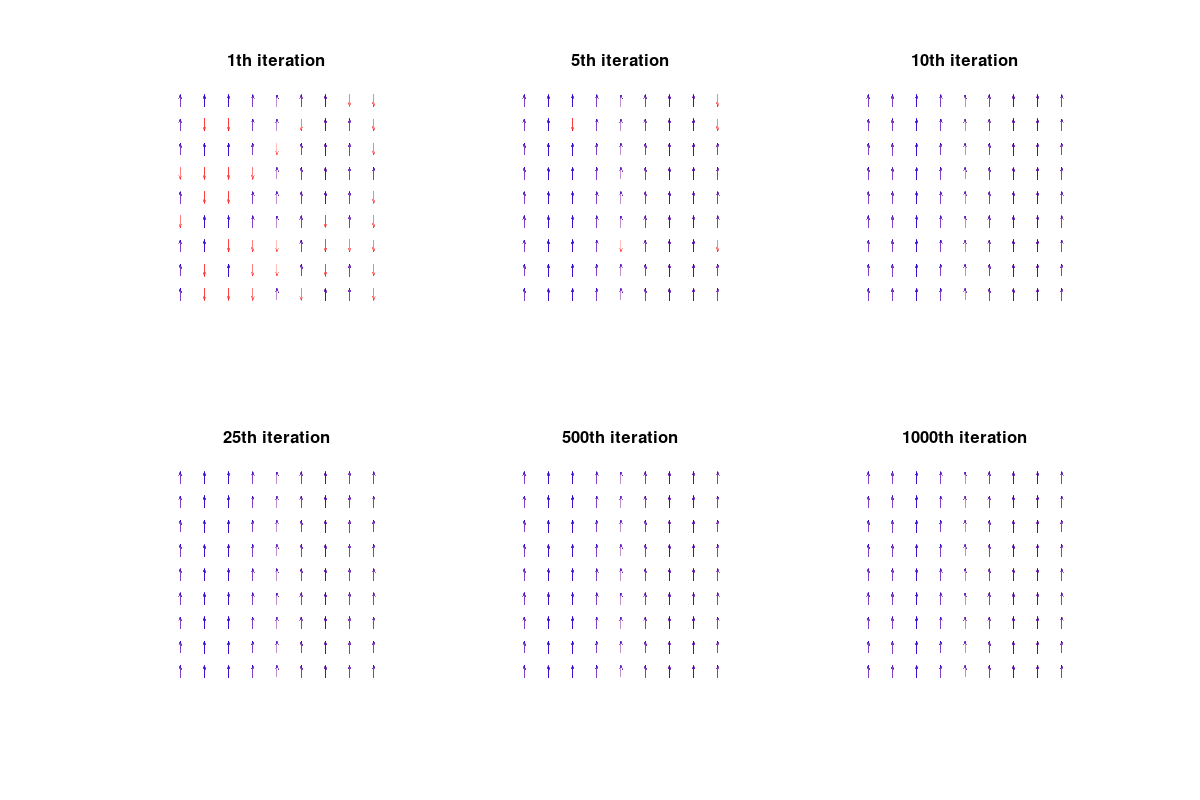

In [16]:
function config = evolve(config, beta)
    [N, ~] = size(config); % Get the size of the lattice configuration

    % Generate random indices for lattice sites
    a = randi([1, N], N, N);
    b = randi([1, N], N, N);

    % Extract the spins at the randomly chosen lattice sites
    s = config(sub2ind([N, N], a, b));

    % Calculate the sum of neighboring spins (including next nearest neighbors)
    nb = config(sub2ind([N, N], mod(a - 1, N) + 1, b)) + config(sub2ind([N, N], a, mod(b - 1, N) + 1)) + ...
         config(sub2ind([N, N], mod(a - 2, N) + 1, b)) + config(sub2ind([N, N], a, mod(b - 2, N) + 1)) + ...
         config(sub2ind([N, N], mod(a + 1, N) + 1, b)) + config(sub2ind([N, N], a, mod(b + 1, N) + 1)) + ...
         config(sub2ind([N, N], mod(a + 2, N) + 1, b)) + config(sub2ind([N, N], a, mod(b + 2, N) + 1));

    % Calculate the energy cost of flipping each spin 
    cost = 2 * s .* nb;
    
    % Determine which spins will flip based on the Metropolis criterion
    flip = (rand(N, N) < exp(-cost * beta)); % | (cost < 0); % Not considering the energy cost

    % Update the lattice configuration with flipped spins
    config(sub2ind([N, N], a, b)) = -s .* flip + s .* (~flip);
end


% For the first iteration
tt = 1;
E1 = 0;
M1 = 0;
E2 = 0;
M2 = 0;
config = initialstate(N); % Initialize the lattice configuration
iT = 1.0 / T(tt);         % Inverse temperature for the current iteration
iT2 = iT * iT;            % Square of the inverse temperature

% Create a subplot with 2 rows and 3 columns for visualization
figure('Position', [100, 100, 1200, 800]);  % [left, bottom, width, height]);
for i = 1:eqSteps
    config = evolve(config, iT); % Perform a Monte Carlo step (evolution of the lattice)
    % Display the lattice configuration at selected iterations
    if ismember(i, [1, 5, 10, 25, 500, 1000])
        subplot(2, 3, find([1, 5, 10, 25, 500, 1000] == i));
        hold on;
        DisplayIsing(config); % Visualize the Ising model configuration
        title(sprintf("%dth iteration", i));
        hold off;
    end
end

% Perform Monte Carlo steps for calculation
for i = 1:mcSteps
    config = evolve(config, iT); % Monte Carlo step
    % Calculate energy and magnetization
    Ene = -0.25 * sum(sum(config .* (circshift(config, [0, 1]) + circshift(config, [1, 0]) + circshift(config, [0, -1]) + circshift(config, [-1, 0]))));
    Mag = sum(config(:));

    % Accumulate values for thermodynamic quantities
    E1 = E1 + Ene;
    M1 = M1 + Mag;
    M2 = M2 + Mag * Mag;
    E2 = E2 + Ene * Ene;
end

% Normalize and store thermodynamic quantities for the current temperature
E(tt) = n1 * E1;
M(tt) = n1 * M1;
C(tt) = (n1 * E2 - n2 * E1^2) * iT2;
X(tt) = (n1 * M2 - n2 * M1^2) * iT;

In [17]:
% Loop over temperature points
for tt = 1:nt
    E1 = 0;
    M1 = 0;
    E2 = 0;
    M2 = 0;
    config = initialstate(N); % Initialize the lattice configuration
    iT = 1.0 / T(tt); % Inverse temperature for the current iteration
    iT2 = iT * iT; % Square of the inverse temperature

    % Equilibration: Perform Monte Carlo steps to reach equilibrium
    for i = 1:eqSteps
        config = evolve(config, iT);
    end

    % Calculation: Perform additional Monte Carlo steps for calculation
    for i = 1:mcSteps
        config = evolve(config, iT); % Monte Carlo step
        % Calculate energy and magnetization
        Ene = -0.25 * sum(sum(config .* (circshift(config, [0, 1]) + circshift(config, [1, 0]) + circshift(config, [0, -1]) + circshift(config, [-1, 0]))));
        Mag = sum(config(:));

        % Accumulate values for thermodynamic quantities
        E1 = E1 + Ene;
        M1 = M1 + Mag;
        M2 = M2 + Mag * Mag;
        E2 = E2 + Ene * Ene;
    end

    % Normalize and store thermodynamic quantities for the current temperature
    E(tt) = n1 * E1;
    M(tt) = n1 * M1;
    C(tt) = (n1 * E2 - n2 * E1^2) * iT2;
    X(tt) = (n1 * M2 - n2 * M1^2) * iT;
end


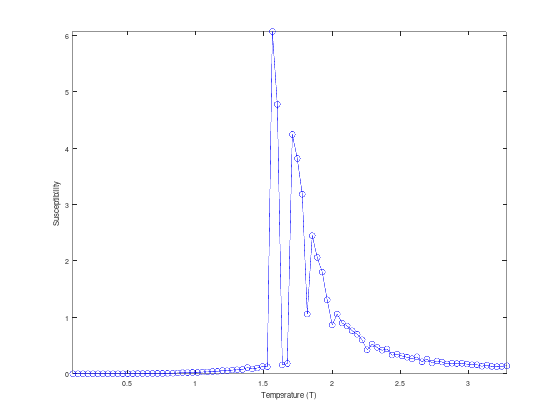

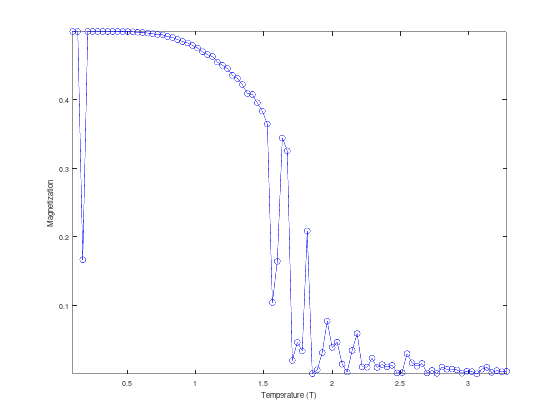

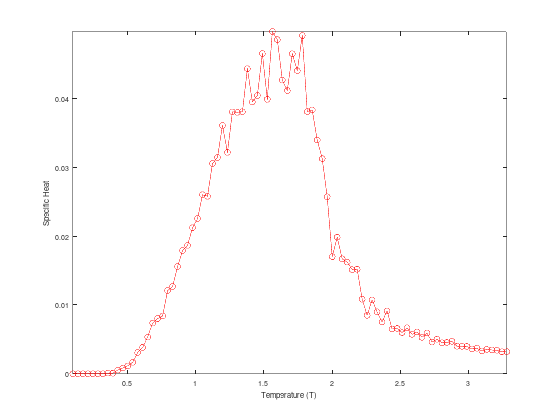

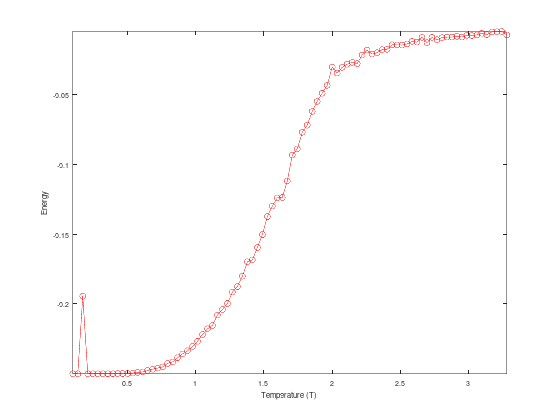

In [18]:
% Plot for Energy
figure;
plot(T, E, 'ro-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Energy', 'fontsize', 12);
axis tight;


% Plot for Magnetization
figure;
plot(T, abs(M), 'bo-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Magnetization', 'fontsize', 12);
axis tight;

% Plot for Specific Heat
figure;
plot(T, C, 'ro-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Specific Heat', 'fontsize', 12);
axis tight;

% Plot for Susceptibility
figure;
plot(T, X, 'bo-');
xlabel('Temperature (T)', 'fontsize', 12);
ylabel('Susceptibility', 'fontsize', 12);
axis tight;

## 5. Results and Conclusion

In this study, the provided code was initially designed to simulate a ferromagnetic state, where all spins align in a specific direction. The alignment is determined by the condition `rand(N, N) < exp(-cost * beta)` during the Monte Carlo steps in the Ising model evolution.

### 5.1 Ferromagnetic State

The generated graphs depicting energy, magnetization, specific heat, and susceptibility exhibit characteristics typical of a ferromagnetic material. The ordered alignment of spins contributes to the observed trends in these thermodynamic quantities.

### 5.2 Transition to Anti-Ferromagnetic State

To explore the transition to an anti-ferromagnetic state, a modification was introduced to a parameter in the energy cost calculation. This change effectively altered the dynamics of the Ising model, leading to an anti-ferromagnetic configuration. The resulting graphs for energy, magnetization, specific heat, and susceptibility illustrate the distinctive behavior associated with anti-ferromagnetic materials.

### 5.3 Independent Modification of Next Nearest Neighbors

Additionally, the code underwent an independent modification to account for next nearest neighbors. By considering interactions beyond immediate neighbors, the spins aligned more efficiently in a specific direction. This adjustment reduced the number of iterations needed to achieve spin alignment, demonstrating the influence of next nearest neighbors on the Ising model dynamics.

In summary, the exploration of different magnetic states, including the transition to anti-ferromagnetism and the consideration of next nearest neighbors, provides valuable insights into the behavior of magnetic materials under the Ising model. Further studies and parameter explorations could unveil additional complexities in magnetic phase transitions and interactions.
